# Correlation analysis

Now we will calculate the correlation of the variables in a dataset. First, we import the data into pandas:

## The dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn import datasets

dataset = datasets.load_boston()
var_names = dataset['feature_names']
X = dataset['data']
y = dataset['target']

In [2]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = pd.DataFrame(X)
data.columns = var_names
data['TARGET'] = pd.DataFrame(y)
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


## Calculating the correlation

In [4]:
correlation = data.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

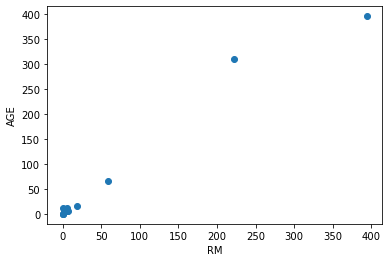

In [5]:
plt.scatter(X[5], X[6])
plt.xlabel(data.columns[5])
plt.ylabel(data.columns[6])
plt.show()

## The correlation plot

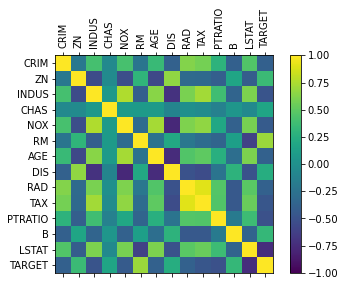

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# This rotates the labels on the x-axis
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

var_names = np.append(var_names, 'TARGET')

ax.set_xticklabels(var_names)
ax.set_yticklabels(var_names)

plt.show()

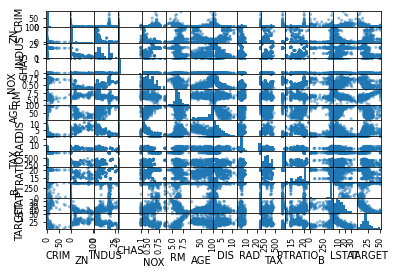

In [7]:
scatter_matrix(data)
plt.show()

## Other measures

Finally, let's compute the $\chi^2$ and mutual information measures. They are typically used in conjunction with the SelectKBest function:

Methods: **'get_support()'** get a mask, integer indx of features selected  
***mutual_info_regression***: mutal information for a continuous target.  
***chi2***: Chi-squared stats of non-negative features for classification tasks.  
****mutual_info_classif***: Mutual information for a discrete target.  

In [8]:
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest

print('Mutual information:')
# Mutual information (for regression)
selected_features = SelectKBest(mutual_info_regression, k=4).fit(data,y)
for feature_name, selected in zip(data.columns, selected_features.get_support()):
    print(feature_name+" is selected "+str(selected))

Mutual information:
CRIM is selected False
ZN is selected False
INDUS is selected True
CHAS is selected False
NOX is selected False
RM is selected True
AGE is selected False
DIS is selected False
RAD is selected False
TAX is selected False
PTRATIO is selected False
B is selected False
LSTAT is selected True
TARGET is selected True


Given that y is continuous, we first bin it for illustration purposes

In [9]:
y_binned = pd.cut(data['TARGET'], 3, labels = ['bin1','bin2','bin3'])

In [10]:
print('Chi-squared: ')
selected_features = SelectKBest(chi2, k=4).fit(data, y_binned)
for feature_name, selected in zip(data.columns, selected_features.get_support()):
    print(feature_name+ ' is selected '+ str(selected))

Chi-squared: 
CRIM is selected False
ZN is selected True
INDUS is selected False
CHAS is selected False
NOX is selected False
RM is selected False
AGE is selected True
DIS is selected False
RAD is selected False
TAX is selected True
PTRATIO is selected False
B is selected False
LSTAT is selected False
TARGET is selected True


In [11]:
print("Mutual information:")
selected_features = SelectKBest(mutual_info_classif, k=4).fit(data, y_binned)
for feature_name, selected in zip(data.columns, selected_features.get_support()):
    print(feature_name+" is selected "+str(selected))

Mutual information:
CRIM is selected False
ZN is selected False
INDUS is selected True
CHAS is selected False
NOX is selected True
RM is selected False
AGE is selected False
DIS is selected False
RAD is selected False
TAX is selected False
PTRATIO is selected False
B is selected False
LSTAT is selected True
TARGET is selected True


In [18]:
x = SelectKBest(mutual_info_classif, k=4).fit(data, y_binned)
x.get_params(deep=True)

{'k': 4,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [19]:
x.get_support()

array([False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True])

In [22]:
x.transform(data)[0]

array([ 2.31 ,  0.538,  4.98 , 24.   ])